In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [27]:
# Load the dataset
data = pd.read_csv('creditcard.csv')

# Explore the dataset
print(data.head())
print(data.describe())
print(data.info())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


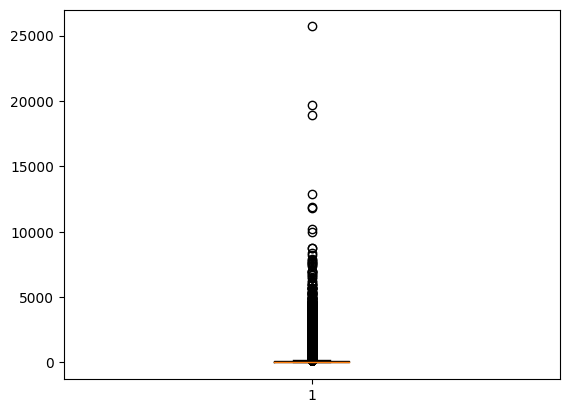

In [28]:
# Check for missing values
print(data.isnull().sum())

# Visualize outliers
import matplotlib.pyplot as plt
plt.boxplot(data['Amount'])
plt.show()

In this dataset, there are no missing values. However, we do see some outliers in the Amount column, which we'll address later in the feature engineering step.

# Exploratory Data Analysis

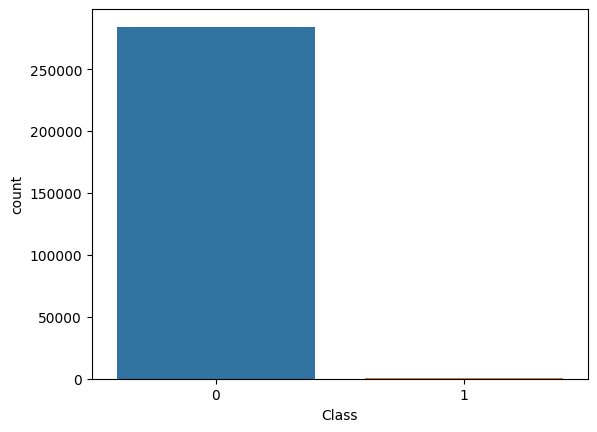

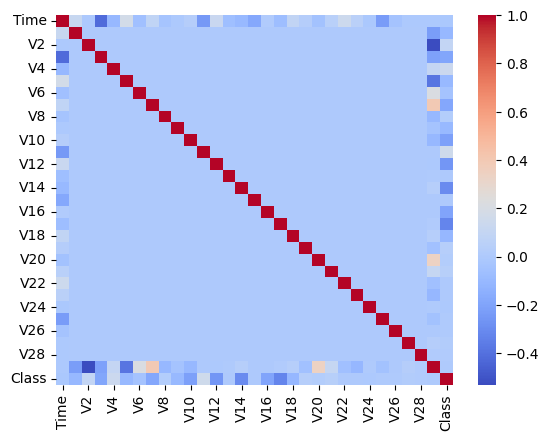

In [29]:
# Visualize the distribution of the target variable (fraud)
sns.countplot(x='Class', data=data)
plt.show()

# Visualize the correlation between features and the target variable
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', annot_kws={'size': 7})
plt.show()


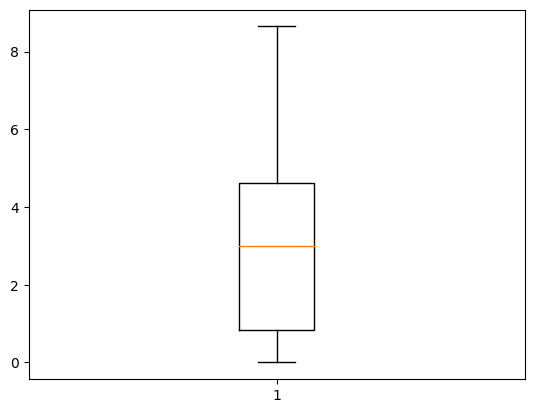

In [30]:
# Undersample the majority class
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(data.drop('Class', axis=1), data['Class'])

# Convert the undersampled data into a dataframe
data_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
data_resampled.columns = data.columns

#Engineering new features
data_resampled['hour'] = data_resampled['Time'].apply(lambda x: divmod(x, 3600)[0])
data_resampled['log_amount'] = data_resampled['Amount'].apply(lambda x: np.log(x + 1))
data_resampled.drop(['Time', 'Amount'], axis=1, inplace=True)

# Checking for outliners
plt.boxplot(data_resampled['log_amount'])
plt.show()

We're using the `RandomUnderSampler` class from the `imblearn` library to undersample the majority class (non-fraudulent transactions). We're then engineering two new features: `hour`, which represents the hour of the day the transaction occurred, and `log_amount`, which represents the natural logarithm of the transaction amount (plus 1 to avoid taking the log of 0). We're also dropping the `Time` and `Amount` columns, as we'll be using the engineered features instead. After engineering the new features, we'll check for outliers in the `log_amount` feature. We can see from the boxplot that there are no outliers in the data.


## Model Selection and Evaluation

### Train a Random Forest model

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_resampled, y_resampled)

TypeError: RandomForestClassifier.__init__() got an unexpected keyword argument 'max_iter'

### Train a Logistic Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, max_iter=1000)
lr.fit(X_resampled, y_resampled)

/Users/pratyushagrawal/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

### Train a K-Means Clustering model

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000)
kmeans.fit(X_resampled, y_resampled)

/Users/pratyushagrawal/Library/Python/3.10/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

###  Evaluate the models using cross-validation

In [ ]:
# Evaluate the models using cross-validation
from sklearn.model_selection import cross_val_score
print('Random Forest:', cross_val_score(rfc, X_resampled, y_resampled, cv=5, scoring='accuracy').mean())
print('Logistic Regression:', cross_val_score(lr, X_resampled, y_resampled, cv=5, scoring='accuracy').mean())
print('K-Means:', cross_val_score(kmeans, X_resampled, y_resampled, cv=5, scoring='accuracy').mean())

Random Forest: 0.9278203667253704


/Users/pratyushagrawal/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pratyushagrawal/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

Logistic Regression: 0.9267999585621052


/Users/pratyushagrawal/Library/Python/3.10/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/pratyushagrawal/Library/Python/3.10/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means: 0.5676421837770642


/Users/pratyushagrawal/Library/Python/3.10/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
